In [119]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  

In [120]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [121]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (13730, 167)
Test data shape: (4576, 47)


In [122]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['NU_NOTA_MT'].sort_values(ascending=False)[:15], '\n')
print (corr['NU_NOTA_MT'].sort_values(ascending=False)[-10:])

NU_NOTA_MT                 1.000000
NU_NOTA_CN                 0.584941
NU_NOTA_CH                 0.529594
NU_NOTA_LC                 0.494695
NU_NOTA_REDACAO            0.379376
TP_DEPENDENCIA_ADM_ESC     0.373233
NU_NOTA_COMP3              0.350307
NU_NOTA_COMP5              0.343337
NU_NOTA_COMP4              0.342282
NU_NOTA_COMP2              0.335638
NU_NOTA_COMP1              0.299402
CO_MUNICIPIO_NASCIMENTO    0.113416
CO_UF_NASCIMENTO           0.112236
CO_MUNICIPIO_PROVA         0.109433
CO_MUNICIPIO_RESIDENCIA    0.108850
Name: NU_NOTA_MT, dtype: float64 

IN_MARCA_PASSO             NaN
IN_SONDA                   NaN
IN_MEDICAMENTOS            NaN
IN_SALA_INDIVIDUAL         NaN
IN_SALA_ESPECIAL           NaN
IN_SALA_ACOMPANHANTE       NaN
IN_MOBILIARIO_ESPECIFICO   NaN
IN_MATERIAL_ESPECIFICO     NaN
TP_PRESENCA_LC             NaN
TP_PRESENCA_MT             NaN
Name: NU_NOTA_MT, dtype: float64


In [123]:
#features = ['NU_INSCRICAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2','NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5']
features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
features_corr = ['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
df_train = train[features_corr]
df_test = test[features]

In [124]:
df_train.isnull().sum()

NU_NOTA_MT         3597
NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
dtype: int64

In [125]:
df_train.shape

(13730, 5)

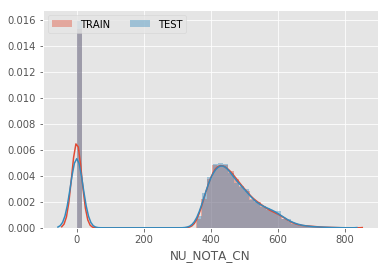

In [126]:
x0 = df_train['NU_NOTA_CN'].fillna(0)
x1 = df_test['NU_NOTA_CN'].fillna(0)


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

In [127]:
# Seleciona somente linhas com valores nesses 4 quesitos a baixo na base de train
#df_train = df_train.loc[
#      (df_train['NU_NOTA_CN'].notnull())  & (df_train['NU_NOTA_CN'] != 0) & (df_train['NU_NOTA_CH'].notnull())      & (df_train['NU_NOTA_CH'] != 0) 
#    & (df_train['NU_NOTA_LC'].notnull())  & (df_train['NU_NOTA_LC'] != 0) & (df_train['NU_NOTA_REDACAO'].notnull()) & (df_train['NU_NOTA_REDACAO'] != 0)    
#]

In [128]:
#df_test = df_test.loc[
#      (df_test['NU_NOTA_CN'].notnull())  & (df_test['NU_NOTA_CN'] != 0) & (df_test['NU_NOTA_CH'].notnull())      & (df_test['NU_NOTA_CH'] != 0) 
 #   & (df_test['NU_NOTA_LC'].notnull())  & (df_test['NU_NOTA_LC'] != 0) & (df_test['NU_NOTA_REDACAO'].notnull()) & (df_test['NU_NOTA_REDACAO'] != 0)    
#]

In [133]:
df_train.isnull().sum()

NU_NOTA_MT         0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64

In [134]:
df_test.isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64

In [131]:
df_train['NU_NOTA_MT'].fillna(0,inplace=True)
df_train['NU_NOTA_CN'].fillna(0,inplace=True)
df_train['NU_NOTA_CH'].fillna(0,inplace=True)
df_train['NU_NOTA_LC'].fillna(0,inplace=True)
df_train['NU_NOTA_REDACAO'].fillna(0,inplace=True)

/home/eduardo/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [132]:

df_test['NU_NOTA_CN'].fillna(0,inplace=True)
df_test['NU_NOTA_CH'].fillna(0,inplace=True)
df_test['NU_NOTA_LC'].fillna(0,inplace=True)
df_test['NU_NOTA_REDACAO'].fillna(0,inplace=True)


In [135]:
df_train.describe()

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
count,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000
mean,356.092607,356.621515,398.923911,381.166737,390.447633
std,228.844193,213.282315,237.174594,234.648409,267.749316
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,365.625000,345.900000,0.000000,0.000000
50%,422.500000,433.100000,499.600000,486.000000,480.000000
75%,504.400000,493.200000,564.400000,548.300000,580.000000
max,952.000000,806.400000,807.000000,763.600000,1000.000000


In [136]:
df_test.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
count,4576.000000,4576.000000,4576.000000,4576.000000
mean,355.886167,398.052906,379.546613,389.278846
std,213.372420,237.129999,233.543656,266.194563
min,0.000000,0.000000,0.000000,0.000000
25%,364.975000,345.500000,0.000000,0.000000
50%,432.450000,499.450000,483.100000,480.000000
75%,493.325000,562.200000,544.600000,580.000000
max,778.900000,773.600000,708.900000,980.000000


In [137]:
y_train = df_train['NU_NOTA_MT']
df_train.drop('NU_NOTA_MT', axis=1, inplace=True)
x_train = df_train
x_test = df_test[features]
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

/home/eduardo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [138]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 500,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)    


In [139]:
regressor.fit(x_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [140]:
x_test = df_test[features] 
x_test = sc.transform(x_test)

In [141]:
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

In [142]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train).round(8)  )
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))

MAE: 40.41969187
MSE: 3659.92535188
RMSE: 60.4973169


In [35]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train).round(8)  )
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))

MAE: 53.31348913
MSE: 4678.43225585
RMSE: 68.39906619


In [143]:
y_pred_test

array([417.9925, 443.4268, 597.2039, ..., 687.5475, 443.0218,   0.    ])

In [144]:
submission = pd.DataFrame()
submission['NU_INSCRICAO'] = test.NU_INSCRICAO

In [145]:
submission['NU_NOTA_MT'] = y_pred_test
submission.sample(20)

,NU_INSCRICAO,NU_NOTA_MT
913,3c69a9f903494bc62eab1f114782bf8eb8380e95,456.6943
868,deedf4f96c04de5d73e84bf87eb67e07de11df96,0.0000
2340,e366080005222df476c35a67b0e008005e41916b,420.6026
4176,29045ca6941cf839378ce5c3ca7ebe5e3ffea2da,0.0000
1653,c26a3a389b250f62571cd7f3a79f77bc2a793ca2,0.0000
2186,5c378b023c3836ce7110247108b52a8e954d598f,436.9121
1552,81460d227c47eafc9ef1542412d5975501b3bbbc,0.0000
1740,91063e48f730917c0d9db5e5268073e1fc0ef9c1,556.6492
270,8257941af168c0cc15f28bd596fd922352dae732,419.7291
307,c8feec2a94d996d03534ce935dec7a034667f107,787.0220


In [146]:
submission.to_csv('submission.csv', index=False, header=True)

SEU SCORE: 77.66%

In [102]:
for index, row in submission.iterrows():
    if(row['NU_NOTA_MT'] == 0):
        print('OK')

In [118]:

submission.sample(20)

,NU_INSCRICAO,NU_NOTA_MT
3784,e172fa5f93736178e35f574e8c2ac09d5191ef51,415.6702
2484,f97331e59feafd161d011018f9c74fba1fae199f,527.1339
2270,03a871e40ccef4f1d570b9cf27afb27ab6d1f35a,542.9936
922,6c45e7e2a9578ff4887d8bc05ca5ab4faed336ed,499.4112
236,80a12b8a4c9df4ef4f78a33d41858b6f1ea24144,434.8621
604,c869448fb5b9ea47f647ea8005fd936725a048df,420.2930
2349,b17ced34952e5be0f0b3c21c873c8809467bfbea,419.5063
3910,6d4bee056abcea733d36060113427081daae72d1,834.5777
416,8637d558542ccd4a1cd1d3ab336711edad60a966,442.6764
3341,c3b255b4dbfc50d5cfe0493c336af4c3114c2077,417.0380
